In [73]:
import sys
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import sqlite3 as db

pd.pandas.set_option('display.max_columns',None)
print(sys.version, sys.platform, sys.executable)

3.6.9 (default, Jun 29 2022, 11:45:57) 
[GCC 8.4.0] linux /usr/bin/python3


In [3]:
# https://towardsdatascience.com/an-easy-beginners-guide-to-sqlite-in-python-and-pandas-fbf1f38f6800
# so the line of code above will connect to a file called my_database.db IF IT EXISTS in the folder. If it does not exist, a file called my_database.db will automatically be created on your computer 

conn = db.connect('../data/news_popularity.db')

# In order to interact with our database, we now have to create a cursor. This is what we will use to issue commands that will allow us to query or modify our database.
# c = conn.cursor()
# good practise to close if not using
# c.close()
# conn.close()

In [4]:
# simplest way
# df = pd.read_sql_query('select * from sqlite_master', conn)
# df

# cursor must select the connected database 
cursor = conn.cursor()
cursor.execute("SELECT name from sqlite_master WHERE type='table';")

print(cursor.fetchall())
cursor.close()

[('articles',), ('description',), ('keywords',)]


In [5]:
df_articles = pd.read_sql_query('select * from articles',conn)
df_description = pd.read_sql_query('select * from description', conn)
df_keywords = pd.read_sql_query('select * from keywords',conn)

print('shape of articles',df_articles.shape)
print('shape of description', df_description.shape)
print('shape of keywords', df_keywords.shape)

shape of articles (39644, 5)
shape of description (39644, 16)
shape of keywords (35680, 11)


##### keywords has lesser rows

In [6]:
df_articles.head()

,ID,url,timedelta,weekday,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505





#### observations for articles
39644 row with 5 columns


to checK:
is url unique through all tables?
#### unique = url and id




In [7]:
df_articles['url'].is_unique

True

#### url column in df_articles in unique, therefore no duplicates url

In [8]:
df_description.head()

,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895


### nothing much in description, deeper of what was in article

In [9]:
df_keywords.head()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_keywords.tail()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
35675,39638,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35676,39639,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764
35677,39640,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830
35678,39642,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883
35679,39643,4.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481


##### nothing much in keywords too, except why is some kw_min_min negative?
### keywords also has less rows then the other two

### ID is unqiue, so is URL, combine by ID as they are universal across the tables

In [11]:
df_articles['ID'].is_unique

True

In [12]:
df_description['ID'].is_unique

True

In [13]:
df_keywords['ID'].is_unique

True

### data here will suggest that keywords have lesser rows and can be populated since URL and ID is unique

### SQL joins
https://www.analyticsvidhya.com/blog/2021/06/join-the-dataframes-like-sql-tables-in-python-using-pandas/


(INNER) JOIN: Returns only those records that have matching values in both DataFrames

LEFT (OUTER) JOIN: Returns all the records from the left DataFrame and the matched records from the right DataFrame

RIGHT (OUTER) JOIN: Returns all the records from the right DataFrame, and the matched records from the left DataFrame

FULL (OUTER) JOIN: Returns all the records when there is a match in either left or right DataFrame


https://www.analyticsvidhya.com/blog/2021/06/15-pandas-functions-to-replicate-basic-sql-queries-in-python/

In [16]:
# https://pandas.pydata.org/docs/user_guide/merging.html

# Something to note is that whilst the default for merge() is "inner", the default for join() is left. 
# So if you are working with index joins be mindful. 

df_premerge = pd.merge(df_keywords, df_description,  on="ID",how="outer")
df_merged = pd.merge(df_premerge, df_articles, on="ID",how="outer")

print('shape of merged is: ',df_merged.shape)

df_merged.head()

shape of merged is:  (39644, 30)


,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505


In [17]:
df_merged['url'].isnull().sum()

0

### confirming that there are no null URLs

In [18]:
df_merged.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

### findings
data_channel is an object

In [19]:
df_merged.isnull().sum()

ID                               0
num_keywords                  3964
kw_min_min                    3964
kw_max_min                    3964
kw_avg_min                    3964
kw_min_max                    3964
kw_max_max                    3964
kw_avg_max                    3964
kw_min_avg                    3964
kw_max_avg                    3964
kw_avg_avg                    3964
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      793
num_self_hrefs                 793
num_imgs                      1586
num_videos                   18633
n_comments                       0
average_token_length             0
data_channel                  6134
self_reference_min_shares      793
self_reference_max_shares      793
self_reference_avg_shares      793
url                              0
timedelta                        0
weekday             

#### num keyword, to kw avg avg has the same sum of null, 
#### num video has the MOST null

### added copy below other wise it only refer instead of copy entirely

In [20]:
# how to get the row of null columns
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df_merge_clean = df_merged.dropna(subset=['num_keywords','kw_min_min','kw_max_min','kw_avg_min']).copy()

In [22]:
print(df_merge_clean.shape)
df_merge_clean.info()

(35680, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   num_keywords               35680 non-null  float64
 2   kw_min_min                 35680 non-null  float64
 3   kw_max_min                 35680 non-null  float64
 4   kw_avg_min                 35680 non-null  float64
 5   kw_min_max                 35680 non-null  float64
 6   kw_max_max                 35680 non-null  float64
 7   kw_avg_max                 35680 non-null  float64
 8   kw_min_avg                 35680 non-null  float64
 9   kw_max_avg                 35680 non-null  float64
 10  kw_avg_avg                 35680 non-null  float64
 11  n_tokens_title             35680 non-null  float64
 12  n_tokens_content           35680 non-null  float64
 13  n_unique_tokens            35680 n

In [23]:
df_merge_clean['shares'].describe()

count     35680.000000
mean       3402.054961
std       11934.878541
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [24]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

In [25]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.pairplot(df_merge_clean.iloc[:100])


In [26]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.heatmap(df_merge_clean.iloc[:100].corr(),annot=True,fmt='.2f',linewidths=2)

#### changing days to 1 2 3 4 5 6 7
mon - 1

tue - 2

wed - 3

thu - 4

fri - 5

sat - 6

sun - 7

In [27]:
df_merge_clean.replace(to_replace = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday'], value=[1,2,3,4,5,6,7], inplace=True)

In [33]:
def printStrToIntDays():
    print('mon - 1\ntue - 2\nwed - 3\nthu - 4\nfri - 5\nsat - 6\nsun - 7')
printStrToIntDays()

mon - 1
tue - 2
wed - 3
thu - 4
fri - 5
sat - 6
sun - 7


#### changing data channel to 0 1 2 3 4 5 6
0 - none

1 - entertainment

2 - business 

3 - technology

4 - lifestyle

5 - world

6 - social media

In [29]:
df_merge_clean['data_channel'].unique()

array(['entertainment', 'business', 'technology', 'lifestyle', 'world',
       None, 'social_media'], dtype=object)

In [30]:
df_merge_clean['data_channel'].replace(to_replace = [np.nan,'entertainment', 'business','technology','lifestyle','world', 'social_media'], value=[0,1,2,3,4,5,6], inplace=True)

In [35]:
def printStrToIntDataChn():
    print('0 - none\n1 - entertainment\n2 - business\n3 - technology\n4 - lifestyle\n5 - world\n6 - social media')
    
printStrToIntDataChn()

0 - none
1 - entertainment
2 - business
3 - technology
4 - lifestyle
5 - world
6 - social media


In [36]:
df_merge_clean['data_channel'].unique()

array([1, 2, 3, 4, 5, 0, 6])

In [38]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                   int64
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

In [39]:
# sns.set(rc={'figure.figsize':(25,25)})
# sns.heatmap(df_merge_clean.iloc[:100].corr(),annot=True,fmt='.2f',linewidths=2)

In [40]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.pairplot(df_merge_clean.iloc[:100])

In [41]:
df_merge_clean.isnull().sum()

ID                               0
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      721
num_self_hrefs                 721
num_imgs                      1419
num_videos                   16755
n_comments                       0
average_token_length             0
data_channel                     0
self_reference_min_shares      721
self_reference_max_shares      721
self_reference_avg_shares      721
url                              0
timedelta                        0
weekday             

In [44]:
df_merge_clean['num_videos'].count()

18925

In [103]:
print('there is num of unique in num_vid: ',len(df_merge_clean['num_videos'].unique()))

print(df_merge_clean['num_videos'].unique())
df_merge_clean['num_videos'].value_counts()

there is num of unique in num_vid:  47
[ 0. nan  1.  6.  3. 11. 21. 12.  7. 10.  2. 26. 14. 17. 13. 20.  9.  4.
 15.  5. 73. 19.  8. 18. 16. 74. 22. 23. 33. 25. 35. 34. 28. 27. 50. 51.
 91. 42. 53. 65. 24. 31. 32. 29. 59. 38. 48.]


0.0     11894
1.0      4511
2.0      1056
3.0       252
11.0      149
4.0       129
10.0      113
21.0      103
5.0        68
26.0       62
6.0        58
16.0       50
9.0        47
12.0       43
7.0        42
25.0       40
8.0        40
13.0       40
14.0       37
15.0       36
17.0       27
20.0       24
27.0       18
22.0       12
18.0       11
31.0        7
33.0        7
19.0        7
24.0        5
51.0        5
28.0        5
50.0        4
23.0        3
74.0        3
34.0        3
73.0        2
32.0        2
42.0        2
65.0        1
29.0        1
53.0        1
48.0        1
59.0        1
35.0        1
38.0        1
91.0        1
Name: num_videos, dtype: int64

what to do with num_video?

In [122]:
scampledf = df_merge_clean.sample(n=100)
scampledf.sort_values('shares',ascending=False)
scampledf.head().transpose()
# scampledf('shares')['num_videos'].T.plot(figsize=('15,15'))

,454,32237,28724,21706,20423
ID,506,35816,31940,24133,22682
num_keywords,8,8,5,10,10
kw_min_min,217,-1,-1,-1,-1
kw_max_min,1700,608,1600,398,754
kw_avg_min,948.833,86,659.8,63.2,236
kw_min_max,0,0,5700,13200,0
kw_max_max,39400,843300,843300,843300,843300
kw_avg_max,6700,381238,344840,309690,201610
kw_min_avg,0,0,1865.82,1480.64,0
kw_max_avg,2614.19,3471.92,26442.9,6026.76,5579.41


In [128]:
df_merge_clean.sort_values('shares',ascending=False).head(5).transpose()
# df_merge_clean.head(5).transpose()

,8438,4848,20927,14666,2828
ID,9365,5370,23237,16268,3145
num_keywords,6,6,10,7,8
kw_min_min,4,4,-1,4,217
kw_max_min,1100,10100,623,6100,414
kw_avg_min,225.5,1937.67,140.8,1139.29,324.375
kw_min_max,2800,10100,2300,1700,16800
kw_max_max,690400,617900,843300,843300,227300
kw_avg_max,430717,280433,165680,540557,103938
kw_min_avg,1700,2874.87,1441,1500,1729.6
kw_max_avg,5117.42,10100,3953.93,15250,5052.38


In [129]:
df_merge_clean.sort_values('shares',ascending=False).tail(5).transpose()

,17086,30957,8814,34777,4253
ID,18957,34398,9771,38633,4709
num_keywords,3,5,1,3,4
kw_min_min,-1,-1,4,-1,217
kw_max_min,4,1400,4,0,397
kw_avg_min,1.53,391.8,4,-1,305.5
kw_min_max,843300,11800,843300,0,15200
kw_max_max,843300,843300,843300,843300,617900
kw_avg_max,843300,328620,843300,296900,329825
kw_min_avg,3575.34,3035.66,3302.65,0,3166.84
kw_max_avg,5933.05,3454.57,3302.65,3396.69,4734.27


In [169]:
df_merge_clean.corr(method='pearson')

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,timedelta,weekday,shares
ID,1.000000,-0.051192,-0.575849,-0.027732,-0.131199,0.077022,0.622082,0.486170,0.152695,0.049157,0.157745,0.241521,0.061073,-0.202291,-0.160412,-0.186741,-0.004523,-0.066599,0.019639,0.008851,-0.009992,-0.135054,0.038891,0.007939,0.008319,0.010675,-0.998605,-0.005028,-0.011850
num_keywords,-0.051192,1.000000,0.003993,0.077930,0.075822,-0.279827,0.007143,-0.332184,-0.273675,0.114603,0.022815,-0.006506,0.072658,-0.081141,-0.028469,-0.083188,0.125015,0.096807,0.086376,-0.026375,0.018497,-0.019132,0.020677,-0.002975,0.010055,0.004205,0.047744,0.055424,0.022312
kw_min_min,-0.575849,0.003993,1.000000,0.010817,0.113214,-0.061783,-0.855694,-0.502312,-0.135510,-0.073444,-0.182811,-0.110738,-0.054191,0.088239,0.047835,0.080898,-0.040746,-0.010653,-0.040539,0.003573,0.014201,0.032443,-0.013470,-0.025213,-0.042361,-0.040157,0.591344,0.003213,0.001851
kw_max_min,-0.027732,0.077930,0.010817,1.000000,0.936524,-0.036382,-0.004193,-0.033398,0.006157,0.597668,0.412477,-0.006996,-0.003224,-0.001591,-0.004388,-0.004705,0.011993,-0.003377,0.000137,-0.003272,0.008956,-0.001947,-0.007858,0.014516,0.046661,0.034732,0.027260,-0.010391,0.016039
kw_avg_min,-0.131199,0.075822,0.113214,0.936524,1.000000,-0.063244,-0.106527,-0.128916,-0.022171,0.550172,0.386339,-0.033171,-0.006946,0.013720,0.013410,0.013250,0.008319,-0.003587,-0.007097,-0.012832,0.009871,0.012011,0.001297,0.015043,0.036673,0.029841,0.132318,-0.003192,0.016558
kw_min_max,0.077022,-0.279827,-0.061783,-0.036382,-0.063244,1.000000,0.066130,0.410415,0.353107,0.020656,0.164566,0.011288,-0.021534,-0.006947,-0.041976,-0.019663,-0.018838,-0.026741,0.001868,0.038018,0.002450,-0.041668,-0.043809,0.006056,0.014900,0.011559,-0.077768,0.006948,0.004437
kw_max_max,0.622082,0.007143,-0.855694,-0.004193,-0.106527,0.066130,1.000000,0.563159,0.157554,0.093639,0.227724,0.121791,0.059750,-0.093755,-0.051728,-0.085395,0.049527,0.001332,0.049083,0.012010,-0.006929,-0.036295,0.011964,0.031465,0.045013,0.045913,-0.637888,0.010317,0.005349
kw_avg_max,0.486170,-0.332184,-0.502312,-0.033398,-0.128916,0.410415,0.563159,1.000000,0.406421,0.140172,0.427351,0.116344,-0.094634,-0.047181,-0.172008,-0.098619,-0.020836,-0.063219,0.001300,0.148279,0.019775,-0.157479,-0.273550,0.050068,0.088784,0.083597,-0.493295,-0.016661,0.042307
kw_min_avg,0.152695,-0.273675,-0.135510,0.006157,-0.022171,0.353107,0.157554,0.406421,1.000000,0.091358,0.450710,-0.002842,-0.023763,-0.026897,-0.072821,-0.065854,0.057545,0.037952,0.079719,0.060715,0.031038,-0.074193,-0.140250,0.032834,0.052187,0.050379,-0.154779,0.031653,0.038199
kw_max_avg,0.049157,0.114603,-0.073444,0.597668,0.550172,0.020656,0.093639,0.140172,0.091358,1.000000,0.811598,0.004318,-0.031600,-0.009801,-0.052360,-0.042646,0.070563,-0.013385,0.064982,0.045047,0.036970,-0.048106,-0.136596,0.085819,0.187707,0.160836,-0.052475,0.015022,0.055697


In [151]:
df_merge_clean.corr(method='kendall')

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,timedelta,weekday,shares
ID,1.000000,-0.036602,-0.742781,-0.069188,-0.307605,0.121906,0.633690,0.370216,0.107345,0.093125,0.127339,0.168803,0.050854,-0.111223,0.050211,-0.099198,-0.018048,-0.043817,0.114400,0.102774,-0.007526,0.007108,0.022729,0.038701,0.032198,0.032505,-0.999205,-0.001254,-0.023693
num_keywords,-0.036602,1.000000,0.028970,0.249226,0.174467,-0.232934,0.025390,-0.232507,-0.197778,0.184824,0.007265,-0.008948,0.056729,-0.068629,0.062565,-0.073883,0.127160,0.061668,0.065482,0.023181,0.024803,0.011360,0.024083,0.007371,0.021404,0.020066,0.036613,0.039040,0.051470
kw_min_min,-0.742781,0.028970,1.000000,0.071250,0.336442,-0.140760,-0.720788,-0.412583,-0.128996,-0.161983,-0.177911,-0.172114,-0.068314,0.116545,-0.068878,0.108622,-0.004174,0.016710,-0.167787,-0.114101,-0.000220,-0.027022,-0.029895,-0.064138,-0.076998,-0.074251,0.743372,0.001697,0.005169
kw_max_min,-0.069188,0.249226,0.071250,1.000000,0.637791,-0.123009,-0.069709,-0.161552,-0.031404,0.158142,0.082251,-0.034607,0.024013,-0.030802,0.023454,-0.026295,0.051453,0.005321,0.015004,-0.023744,0.024154,-0.002475,0.006130,0.009222,0.013654,0.016574,0.069232,0.015527,0.062410
kw_avg_min,-0.307605,0.174467,0.336442,0.637791,1.000000,-0.158087,-0.369542,-0.338723,-0.077579,0.060014,-0.014922,-0.086541,0.005705,0.005247,0.003473,0.010179,0.028847,-0.001489,-0.026214,-0.078687,0.022167,-0.009210,0.015504,-0.023839,-0.024336,-0.022349,0.307837,0.013337,0.064298
kw_min_max,0.121906,-0.232934,-0.140760,-0.123009,-0.158087,1.000000,0.130295,0.287954,0.847909,0.090569,0.366946,0.012444,-0.022483,0.001249,-0.019236,-0.022375,0.016097,0.061864,0.035124,0.057159,0.014686,-0.021249,-0.077225,0.048815,0.071206,0.067953,-0.121999,0.018301,0.040866
kw_max_max,0.633690,0.025390,-0.720788,-0.069709,-0.369542,0.130295,1.000000,0.434862,0.116016,0.160223,0.177256,0.137819,0.065869,-0.087296,0.067987,-0.083919,0.049811,0.034554,0.139500,0.095981,-0.010031,0.022837,0.009797,0.085715,0.107551,0.106870,-0.634194,0.006678,-0.026076
kw_avg_max,0.370216,-0.232507,-0.412583,-0.161552,-0.338723,0.287954,0.434862,1.000000,0.274812,0.220163,0.352351,0.088017,-0.074165,0.033156,-0.069383,-0.001178,-0.023282,-0.009734,0.002765,0.175651,0.008747,-0.016417,-0.206932,0.084226,0.088532,0.094139,-0.370520,-0.007346,0.023480
kw_min_avg,0.107345,-0.197778,-0.128996,-0.031404,-0.077579,0.847909,0.116016,0.274812,1.000000,0.133505,0.427543,-0.000962,-0.032766,0.001835,-0.029275,-0.027324,0.022809,0.052439,0.043325,0.061555,0.027570,-0.032128,-0.100092,0.066691,0.082746,0.084198,-0.107433,0.021954,0.075106
kw_max_avg,0.093125,0.184824,-0.161983,0.158142,0.060014,0.090569,0.160223,0.220163,0.133505,1.000000,0.611514,-0.001120,-0.061549,0.017797,-0.052376,-0.025355,0.073139,-0.022220,0.062982,0.151281,0.064772,-0.036533,-0.231050,0.120953,0.109181,0.129794,-0.093215,0.037061,0.152533


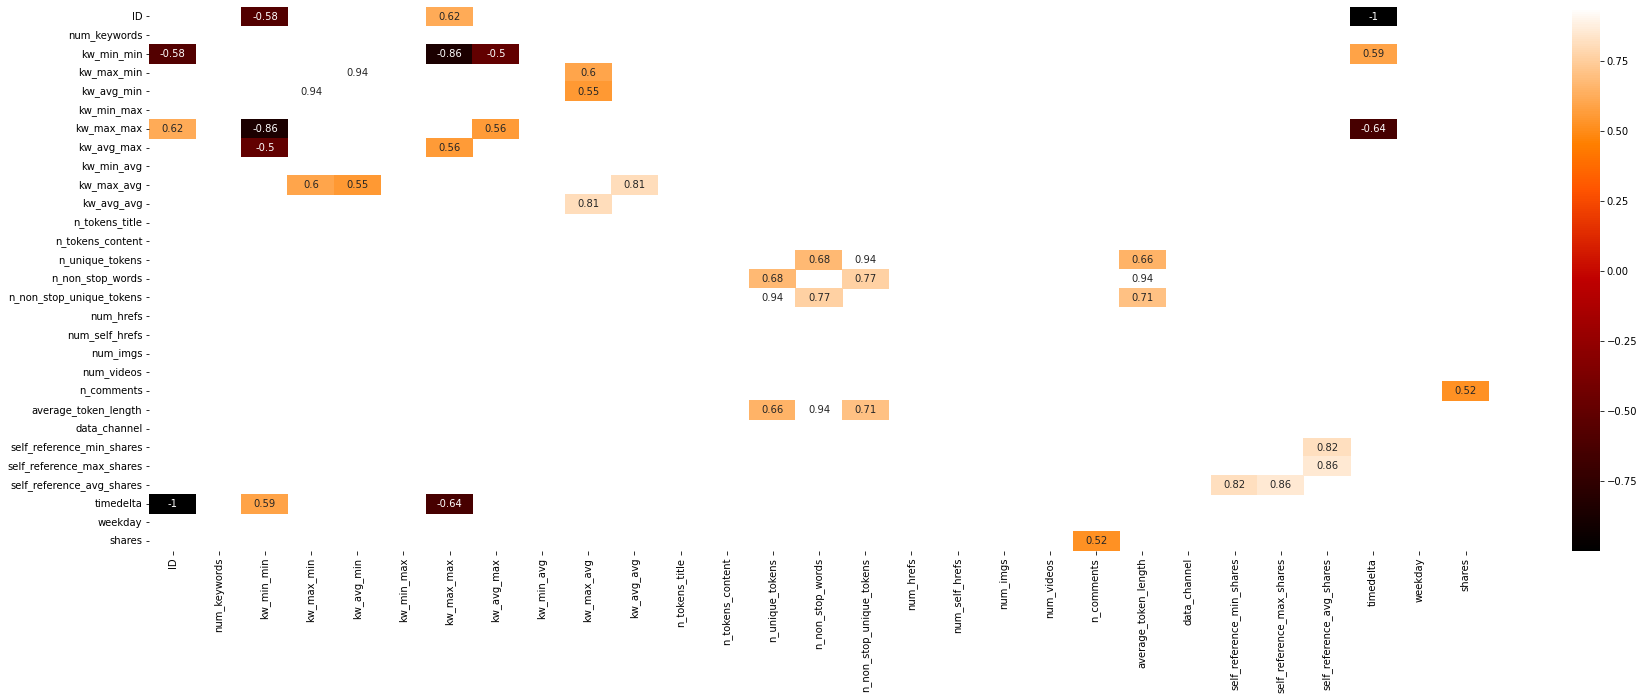

In [170]:
c = df_merge_clean.corr()
filteredDf = c[((c >= .5) | (c <= -0.5)) & (c != 1.0)]

plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap='gist_heat')
plt.show()

# s = c.unstack()
# so = s.sort_values(kind='quicksort',ascending=False)
# so

In [167]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr != 1)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_merge_clean, .7)

ID                         timedelta                   -0.998605
kw_max_max                 kw_min_min                  -0.855694
n_non_stop_unique_tokens   average_token_length         0.705901
n_non_stop_words           n_non_stop_unique_tokens     0.765362
kw_max_avg                 kw_avg_avg                   0.811598
self_reference_avg_shares  self_reference_min_shares    0.822328
                           self_reference_max_shares    0.858223
kw_max_min                 kw_avg_min                   0.936524
n_non_stop_unique_tokens   n_unique_tokens              0.937611
average_token_length       n_non_stop_words             0.943868
ID                         ID                                NaN
dtype: float64

In [173]:
from scipy.stats import pearsonr

def getCorrelation_pVal(column1, column2,df):
    pearson_corr,p_value = pearsonr(df[column1],df[column2])
    print("correlation between {} and {} is {}".format(column1, column2, pearson_corr))
    print("P-value for this correlation is {}".format(p_value))

In [174]:
getCorrelation_pVal('shares','n_comments',df_merge_clean)

correlation between shares and n_comments is 0.5230295993689552
P-value for this correlation is 0.0


In [175]:
df_merge_clean['shares'].describe()

count     35680.000000
mean       3402.054961
std       11934.878541
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

#### average shares is 3402, max of 843 300 and low of 4

## cont the rest on py file

In [176]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC,SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split, cross_validate
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [188]:
# did on py file instead

# df_merge_clean.dropna(inplace=True)
# x_train, x_test, y_train, y_test = train_test_split(df_merge_clean.drop(['url'],axis=1), df_merge_clean['shares'], test_size=0.3, random_state=42)

In [189]:
# did on py file instead

# models = [LogisticRegression(),
#          LinearSVC(),
#           SVC(kernel='rbf'),
#          KNeighborsClassifier(),
#          RandomForestClassifier(),
#          DecisionTreeClassifier(),
#          GradientBoostingClassifier(),
#          GaussianNB()]

# model_names = ['LogisticRegression', 'LinearSVM','rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
#               'GradientBoostingClassifier', 'GaussianNB']

In [190]:
# did on py file instead

# acc = []
# eval_acc = {}

# for model in range(len(models)):
#     classification_model = models[model]
#     classification_model.fit(x_train,y_train)
#     pred = classification_model.predict(x_test)
#     acc.append(accuracy_score(pred,y_test))
    
# eval_acc =  {'Modelling Algo': model_names, 'Accuracy':acc}
# eval_acc

KeyboardInterrupt: 

# end

## to revist again maybe, objectively trying to find how to get more shares was not easy and not sure of what the models will achieve 

In [137]:
df_merge_clean['timedelta'].describe()

count    35680.000000
mean       354.523234
std        214.301086
min          8.000000
25%        163.000000
50%        339.000000
75%        543.000000
max        731.000000
Name: timedelta, dtype: float64

In [55]:
print('missing = ', (16755/35680) * 100 ,'%')

missing =  46.95908071748879 %


plot a boxplot to check for outlier

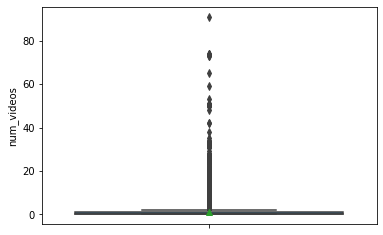

In [83]:
ax = sns.boxplot(y=df_merge_clean['num_videos'],showmeans=True)

# if want to plot inteval
# ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

In [92]:
df_merge_clean['num_videos'].describe()

count    18925.000000
mean         1.286446
std          4.148189
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

so it seems 91 is an out lier

In [ ]:
temp_df = df_merge_clean.dropna(how='any')
df_merge_clean.shape

In [ ]:
temp_df.shape

In [ ]:
short_df = temp_df.sample(n=50)
short_df.shape

In [ ]:
# sns.set(rc={'figure.figsize':(25,25)})
# sns.heatmap(short_df.corr(),annot=True,fmt='.2f',linewidths=2)

In [ ]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.pairplot(short_df)

### will data imputation be yay or nay?